# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as scp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Задание 1. Первичный анализ данных c Pandas

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [3]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


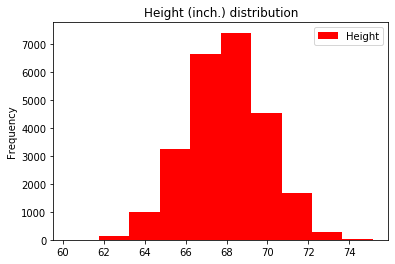

In [4]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution')

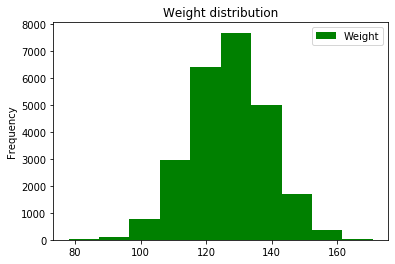

In [5]:
data.plot(y='Weight', kind='hist', color='green',  title='Weight distribution')

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

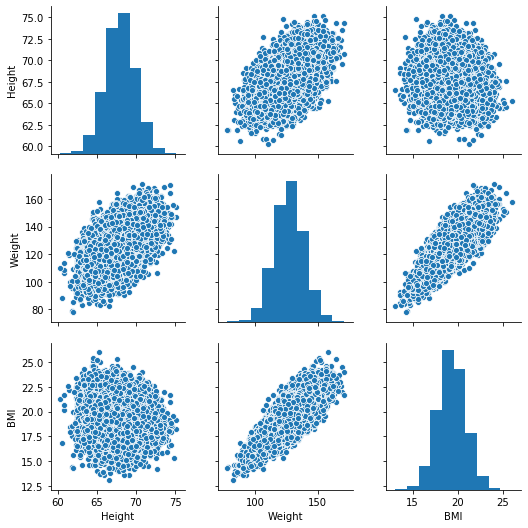

In [8]:
sns.pairplot(data)

In [9]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else: 
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

[Text(0, 0.5, 'Весовая категория'), Text(0.5, 0, 'Рост')]

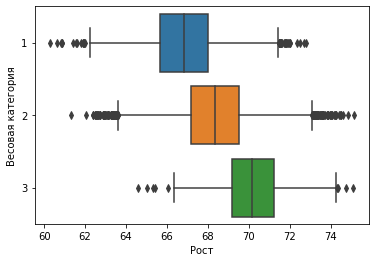

In [20]:
ax = sns.boxplot(y='weight_cat', x='Height', data=data, orient='h')
ax.set(ylabel='Весовая категория', xlabel='Рост')

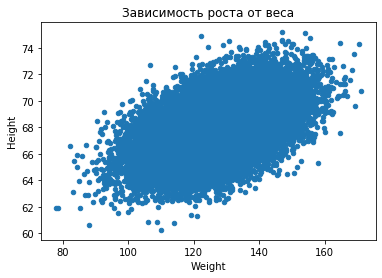

In [11]:
data.plot(kind='scatter', x='Weight', y='Height', title='Зависимость роста от веса')

## Задание 2. Минимизация квадратичной ошибки


In [12]:
def fun(w):
    w0, w1 = w[0], w[1]
    return w0 + w1*data["Weight"]

def error(w):
    w0, w1 = w[0], w[1]
    return sum((data["Height"] - fun([w0, w1]))**2)

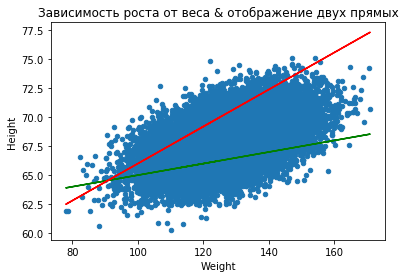

In [13]:
data.plot(kind='scatter', x='Weight', y='Height', title='Зависимость роста от веса & отображение двух прямых')
plt.plot(data["Weight"], fun([60, 0.05]), 'g')
plt.plot(data["Weight"], fun([50, 0.16]), 'r')

Text(0.5, 1.0, 'график зависимости функции ошибки от параметра  w1  при  w0  = 50')

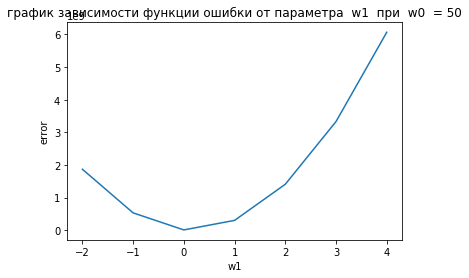

In [14]:
plt.plot(list(range(-2, 5)), [error([50, w1]) for w1 in range(-2, 5)])
plt.xlabel('w1')
plt.ylabel('error')
plt.title('график зависимости функции ошибки от параметра  w1  при  w0  = 50')


In [22]:
f = lambda w1: error([50, w1])
w1_opt = scp.minimize_scalar(f, [-5,5]).x
w1_opt

0.14109203728833175

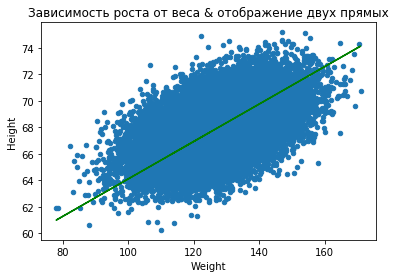

In [16]:
data.plot(kind='scatter', x='Weight', y='Height', title='Зависимость роста от веса & отображение двух прямых')
plt.plot(data["Weight"], fun([50, w1_opt]), 'g')

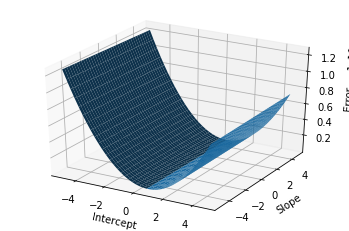

In [17]:
import itertools as it
fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(w0, w1)
err = np.array([error([w0, w1]) for w0, w1 in it.product(w0,w1)]).reshape(W0.shape)

surf = ax.plot_surface(W0, W1, err)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [18]:
w = scp.minimize(error, x0=[0, 0], bounds=[[-100, 100],[-5, 5]], method='L-BFGS-B').x
w

array([57.57175901,  0.08200662])

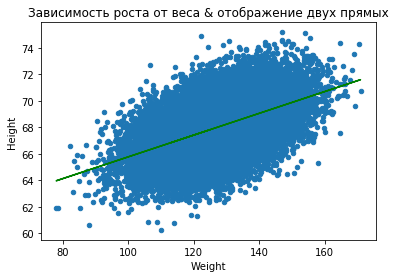

In [19]:
data.plot(kind='scatter', x='Weight', y='Height', title='Зависимость роста от веса & отображение двух прямых')
plt.plot(data["Weight"], fun(w), 'g')